# IMPORT LIBRARY

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
%matplotlib inline


# Import dataset from seaborn with load_dataset function

In [66]:
dtst=sns.load_dataset('titanic')
print(dtst.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None


# Convert dataset into DataFrame using panda


In [67]:
dt_frame=pd.DataFrame(dtst)
print(dt_frame)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

# As you can see, there are 14 columns and  890 rows, but we only need 7 columns, so we shal trim the dataset.


In [68]:
trim_d=dt_frame[['survived', 'pclass', 'sex', 'age', 'fare', 'embark_town', 'deck']]  
print(trim_d)

     survived  pclass     sex   age     fare  embark_town deck
0           0       3    male  22.0   7.2500  Southampton  NaN
1           1       1  female  38.0  71.2833    Cherbourg    C
2           1       3  female  26.0   7.9250  Southampton  NaN
3           1       1  female  35.0  53.1000  Southampton    C
4           0       3    male  35.0   8.0500  Southampton  NaN
..        ...     ...     ...   ...      ...          ...  ...
886         0       2    male  27.0  13.0000  Southampton  NaN
887         1       1  female  19.0  30.0000  Southampton    B
888         0       3  female   NaN  23.4500  Southampton  NaN
889         1       1    male  26.0  30.0000    Cherbourg    C
890         0       3    male  32.0   7.7500   Queenstown  NaN

[891 rows x 7 columns]


# Some of the columns data are missing, especially 'age' & 'deck'... 

#So we shall replace NaN with mean of the column(for age).
#So what of deck? 
#Well, the missing data is very large (787), so trying to input the NaN with mean or mode will tilt the analysis to bias.
#The two approach is to either use model to predict missing value, or to delete them. We will choose the later.

##so what's the mean of age? 


# print(trim_d['age'].mean())

# for 'deck'

In [69]:
print(trim_d['deck'].dropna())  

1      C
3      C
6      E
10     G
11     C
      ..
871    D
872    B
879    C
887    B
889    C
Name: deck, Length: 203, dtype: category
Categories (7, object): [A, B, C, D, E, F, G]


#For age, 29.7 is the mean. For deck, we delete the NaN. 
#so we replace NaN with 29.7 in feature 'age'

In [70]:
trim_d['age']=trim_d['age'].fillna(29.7)
print(trim_d['age'])
trim_d['deck']=trim_d['deck'].dropna()


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.7
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


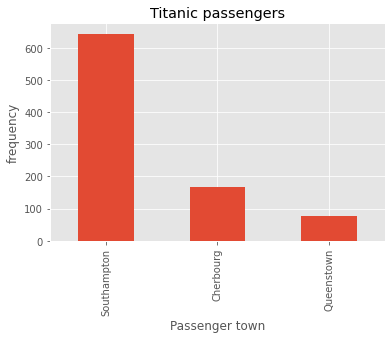

In [71]:
fig=plt.figure() 
ax=plt.axes() 
plot1=trim_d['embark_town'].value_counts()
plt.style.use('ggplot')
plot1.plot(kind='bar') 
plt.xlabel('Passenger town')
plt.ylabel('frequency') 
plt.title('Titanic passengers')
plt.show()

# From the column 'embark_town', most passengers are from Southampton(644), with Cherboug(168) and Queenstown (76) with the least

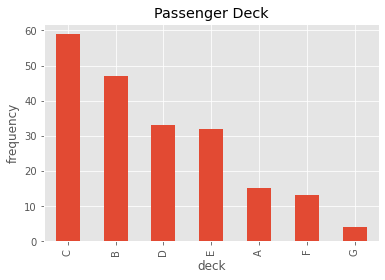

In [72]:
fig=plt.figure() 
ax=plt.axes() 
plot1=trim_d['deck'].value_counts()
plt.style.use('ggplot')
plot1.plot(kind='bar') 
plt.xlabel('deck')
plt.ylabel('frequency') 
plt.title('Passenger Deck')
plt.show() 

As we can see, Most passengers are on deck C(59) and B(47). 
Other decks are D(33),E(32). F(13)& G(4) have the least passengers

# We would performed bivariate analysis on 'embark_town' & 'deck' to check for relationships. 


# We used Grouped bar plots as bivariate analysis to see the relationship. 
The decks  are on the x-axis
and it contains segments of 'embark_towns' in percentage.


# Southampton =RED
## Cherbourg = BLUE 
## Queenstown= PURPLE

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


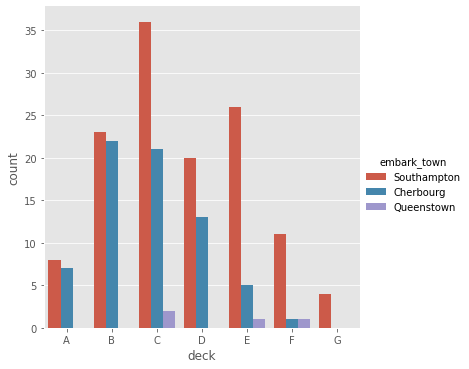

In [73]:
 sns. catplot('deck', data=trim_d, kind='count', hue='embark_town', order=['A','B', 'C', 'D', 'E', 'F', 'G'], 
               hue_order=['Southampton','Cherbourg','Queenstown'],aspect=1)

# It's seen that passengers from 'Southampton' dominates all deck, while passengers from 'Queenstown' are present only in C, E & F. 



# Can we say that... 
#could it be that the ship starts from Southampton, where it took most of its passengers, then pass through Cherbourg and lastly to Queenstown to fill up? 

maybe.

# To get the relationship between deck, embark town and survivals... 

## We shall be using grouped bar to classify the decks. 

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


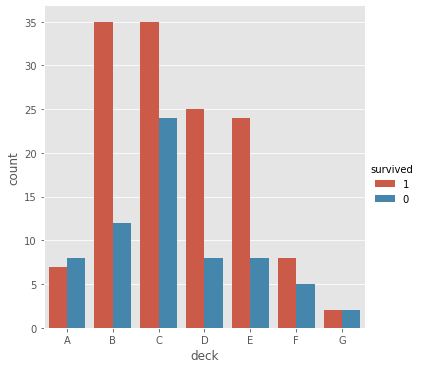

In [74]:
 sns. catplot('deck', data=trim_d, kind='count', hue='survived', order=['A','B', 'C', 'D', 'E', 'F', 'G'], 
               hue_order=[1,0], aspect=1)

# Majority of survivals are passengers from deck 'B', 'C', 'D' & E

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


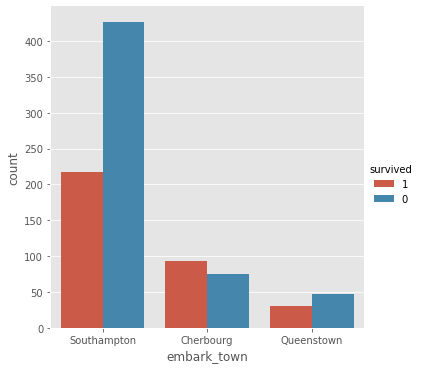

In [75]:
sns. catplot('embark_town', data=trim_d, kind='count', hue='survived', order=['Southampton', 'Cherbourg', 'Queenstown'], 
               hue_order=[1,0], aspect=1)

# Despite 'Southampton' being the town with largest passengers, most of them never survived, although, those who survived are still much more than survivals from other towns. 

## The survived passengers from Cherbourg are more than the dead ones.

# I USED A TWO-WAY ANOVA TO CHECK FOR CORRELATIONS

In [76]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

  

In [77]:
two_anova=ols('survived ~ C(embark_town)  + C(deck) + C(embark_town):C(deck)', data=trim_d).fit()
sm.stats.anova_lm(two_anova, typ=3)

covariance of constraints does not have full rank. The number of constraints is 12, but rank is 9


,sum_sq,df,F,PR(>F)
Intercept,2.285714,1.0,10.225236,0.001630
C(embark_town),0.507241,2.0,1.134582,0.323784
C(deck),0.916364,6.0,0.683232,0.663385
C(embark_town):C(deck),1.219272,12.0,0.454539,0.903179
Residual,41.354267,185.0,NaN,NaN


# Since Pr(>F)  is more than .05,embark_town is highly correlated with survived  
